# ANN Session 2 - Tensorflow

In [1]:
!pip install --user tensorflow==2.0.0-beta1 

In [2]:
!pip install --user matplotlib

In [3]:
%matplotlib inline

In [4]:
import tensorflow as tf
import matplotlib
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Numpy Introduction


## Reference


- Numpy Manual: https://docs.scipy.org/doc/numpy/

## Create Arrays

### Manual Creation

In [2]:
a1 = np.array([[1,2,3],[4,5,6],[7,8,9]])
a1

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

### Reshape

In [4]:
a2 = np.arange(1,10).reshape(3,3)
a2

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

### zeors, ones, empty, random, randn

In [19]:
a3 = np.empty((3,3))
a4 = np.zeros((3,3))
a5 = np.ones((3,3))
a6 = np.random.random((3,3))
a7 = np.random.randn(3,3)

In [20]:
print(a3)
print(a4)
print(a5)
print(a6)
print(a7)

[[0.02672073 0.02187643 0.4678585 ]
 [0.35291767 0.55938792 0.63978859]
 [0.00236754 0.73405913 0.60401492]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[0.14632512 0.00217788 0.33860242]
 [0.50195679 0.48885571 0.53246609]
 [0.86471787 0.52317316 0.41747568]]
[[ 0.91638144 -0.27025889  0.15338124]
 [ 0.27036187 -1.13545199  0.52344489]
 [-0.22638479 -0.93187621 -0.62970331]]


## Array Propertites

### ndim, shape, size, dtype

In [23]:
a1 = np.arange(1,10).reshape(3,3)
a1

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [24]:
print(a1.ndim)
print(a1.shape)
print(a1.size)
print(a1.dtype)

2
(3, 3)
9
int64


### Change dtype

In [28]:
a2 = a1.astype(float)
print(a1)
print(a1.dtype)
print(a2)
print(a2.dtype)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
int64
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
float64


## Functions

### Basic

In [29]:
a1 = np.array([[1,2,3], [4,5,6], [7,8,9]])
a2 = np.ones((3,3))
print(a1)
print(a2)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [30]:
print(a1 + a2)

[[ 2.  3.  4.]
 [ 5.  6.  7.]
 [ 8.  9. 10.]]


In [31]:
print(a1 - a2)

[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]


In [33]:
print(a1 + 2 * a2)

[[ 3.  4.  5.]
 [ 6.  7.  8.]
 [ 9. 10. 11.]]


In [36]:
print(a1.sum())
print(a1.max())
print(a1.min())

45
9
1


### Customized Functions

In [40]:
def gaussian(x, m, s):
    return (1.0 / (s * np.sqrt(2 * np.pi))) * np.exp(-np.power(x - m, 2.0) / (2 * np.power(s, 2.0)))

In [45]:
x = np.linspace(-5, 5, 200)

In [46]:
y = gaussian(x,0,1)

In [57]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

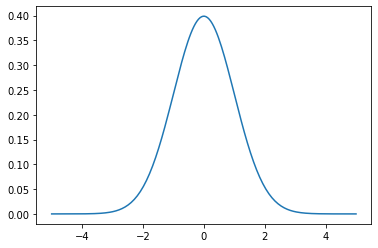

In [58]:
plt.plot(x,y)
plt.show

# Tensorflow Basic

- Architecture: https://www.tensorflow.org/guide/extend/architecture

## Low Level API

- TensorFlow Core
- The interal exposed API for advanced users
- Not recommended for most users

## High Level API

- Keras: https://keras.io/
- Fast prototyping
- Production
- User friendly

## Demo 1 - Regression

**Regression Target Function**: y = x\*\*2 + y\*\*2

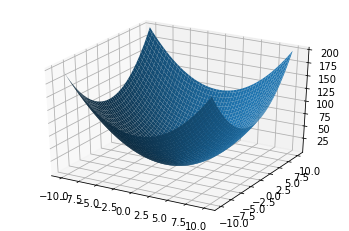

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

### Build the Model

- Input: [x, y]
- Ouput: z
- Num. of layers: 1 x Input + 1 x Hidden + 1 x Output = 3

In [80]:
model = keras.Sequential(
    [
        layers.Dense(64, activation='sigmoid', input_shape=(2,)),
        layers.Dense(1)
    ]
)
optimizer = keras.optimizers.RMSprop(0.01)
model.compile(
    loss='mse',
    optimizer=optimizer,
    metrics=['mse']
)
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 64)                192       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 65        
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [81]:
def sampling(x, y):
    X, Y = np.meshgrid(x, y)
    Z = X**2 + Y**2
    samples = np.stack((X.flatten(),Y.flatten(),Z.flatten()), axis=1)
    np.random.shuffle(samples)
    return samples

def split_labels(samples):
    return (samples[:,0:-1], samples[:,-1])

def split_samples(samples, ratio):
    sep = int(samples.shape[0] * split_ratio)
    return (samples[0:sep], samples[sep:])

In [82]:
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)

samples = sampling(x, y)

train_samples, test_samples = split_samples(samples, 0.8)

(train_x, train_y) = split_labels(train_samples)
(test_x, test_y) = split_labels(test_samples)

model.fit(train_x, train_y, batch_size=100, epochs=10)

Train on 800000 samples
Epoch 1/10
800000/800000 [==============================] - 15s 19us/sample - loss: 1813.9318 - mse: 1813.9301
Epoch 2/10
800000/800000 [==============================] - 15s 19us/sample - loss: 1317.3673 - mse: 1317.3671
Epoch 3/10
800000/800000 [==============================] - 15s 19us/sample - loss: 6.2220 - mse: 6.2220
Epoch 4/10
800000/800000 [==============================] - 16s 20us/sample - loss: 0.9184 - mse: 0.9184
Epoch 5/10
800000/800000 [==============================] - 16s 19us/sample - loss: 0.8406 - mse: 0.8406
Epoch 6/10
800000/800000 [==============================] - 16s 20us/sample - loss: 0.7905 - mse: 0.7905
Epoch 7/10
800000/800000 [==============================] - 16s 20us/sample - loss: 0.7508 - mse: 0.7508
Epoch 8/10
800000/800000 [==============================] - 17s 21us/sample - loss: 0.7179 - mse: 0.7179
Epoch 9/10
800000/800000 [==============================] - 16s 20us/sample - loss: 0.6840 - mse: 0.6840s - loss: 
Epoch 10/

In [83]:
ret = model.evaluate(test_x, test_y)

200000/200000 [==============================] - 7s 33us/sample - loss: 0.8519 - mse: 0.8519


10000/10000 [==============================] - 1s 51us/sample - loss: 0.8901 - mse: 0.8901
(100, 100)
(10000, 1)


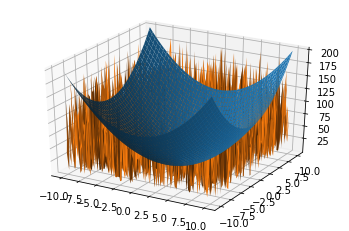

In [92]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

v_samples = sampling(x, y)
v_x, v_actual = split_labels(v_samples)
v_y = model.predict(v_x)
model.evaluate(v_x, v_actual)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
ax.plot_surface(X, Y, v_y.reshape(100,100))